# Time Series Analysis 
## Lab 4

In [31]:
"""
@original_author: Dominik Cedro
@date_of_creation: 2024-04-05
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('IBM.csv', index_col=0)
print(df.head())
print('********************************')
print(df.info())
print('********************************')
print(df.describe())
print('********************************')
print(df.tail())
print('********************************')

# Prepare the data
print(df.isnull().sum())
df = df.dropna()



                  Open        High         Low       Close  Adj Close   Volume
Date                                                                          
2010-10-01  129.550674  130.286804  129.149139  129.674957  79.766045  5879775
2010-10-04  129.282990  129.942642  128.479919  129.302109  79.536659  4246655
2010-10-05  130.191208  131.835571  130.133850  131.606125  80.953957  6487815
2010-10-06  130.860428  131.892929  130.812622  131.778198  81.059753  5003018
2010-10-07  131.854691  132.772461  131.472275  132.619507  81.577278  6737077
********************************
<class 'pandas.core.frame.DataFrame'>
Index: 3070 entries, 2010-10-01 to 2022-12-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3070 non-null   float64
 1   High       3070 non-null   float64
 2   Low        3070 non-null   float64
 3   Close      3070 non-null   float64
 4   Adj Close  3070 non-null   float64
 5   Volume     30

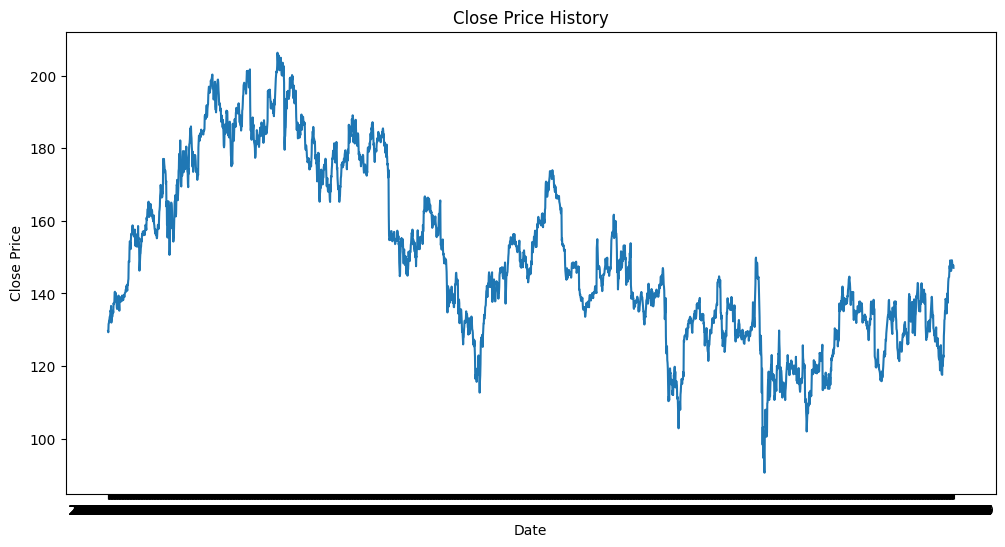

In [32]:
# Plot the 'Close' column over time
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


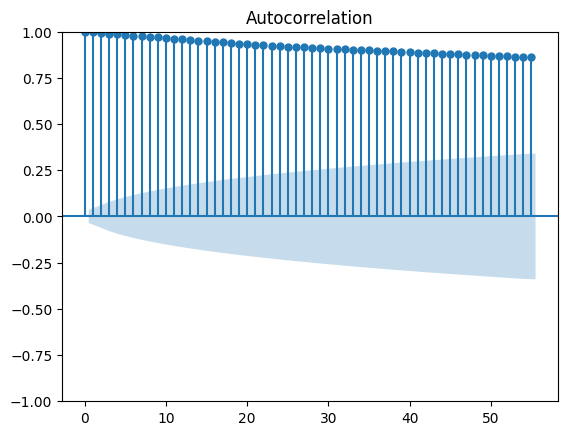

In [33]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot

# Plot of autocorrelation for column 'Close'
plot_acf(df['Close'], lags=55)
plt.show()


In [34]:
# use Ljung Box test to check if the data is white noise
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung Box test
ljung_box = acorr_ljungbox(df['Close'], lags=20)
print(ljung_box)


         lb_stat  lb_pvalue
1    3050.121840        0.0
2    6078.942951        0.0
3    9086.333867        0.0
4   12072.899448        0.0
5   15039.835440        0.0
6   17987.203627        0.0
7   20916.682143        0.0
8   23826.793115        0.0
9   26719.233328        0.0
10  29592.497443        0.0
11  32446.099355        0.0
12  35280.302740        0.0
13  38095.612004        0.0
14  40892.215197        0.0
15  43668.966258        0.0
16  46427.330494        0.0
17  49167.132232        0.0
18  51888.572375        0.0
19  54591.776404        0.0
20  57278.038323        0.0


In [35]:
# dicki fuller test to check if the data is stationary
from statsmodels.tsa.stattools import adfuller

# Dickey Fuller test
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.877810
p-value: 0.342571
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567


In [36]:
# diff 1
df['Close_diff1'] = df['Close'].diff()
df = df.dropna()

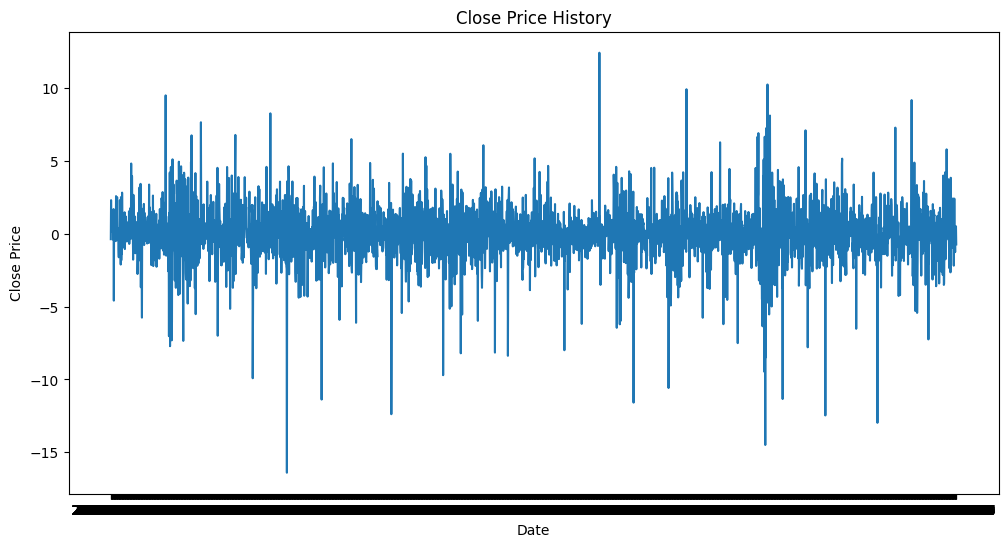

In [37]:
# Plot the 'Close_diff1' column over time
plt.figure(figsize=(12,6))
plt.plot(df['Close_diff1'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

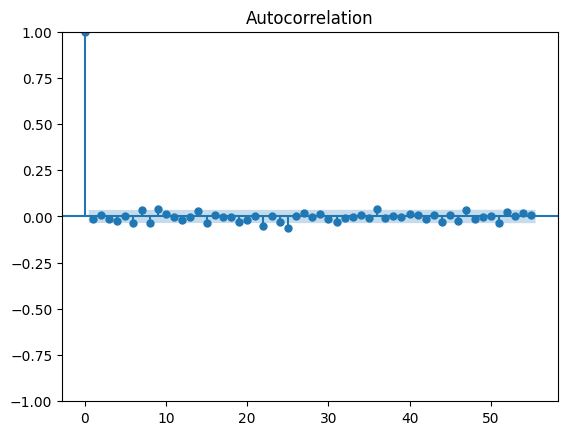

In [38]:
# Plot of autocorrelation for column 'Close_diff1'
plot_acf(df['Close_diff1'], lags=55)
plt.show()

In [39]:
# Ljung Box test
ljung_box = acorr_ljungbox(df['Close_diff1'], lags=20)
print(ljung_box)

      lb_stat  lb_pvalue
1    0.437349   0.508405
2    0.638811   0.726581
3    1.075468   0.782999
4    2.934109   0.568912
5    2.934658   0.710059
6    6.924752   0.327862
7   10.816295   0.146835
8   15.222087   0.054968
9   19.632677   0.020320
10  20.117615   0.028160
11  20.128964   0.043603
12  21.106006   0.048850
13  21.119190   0.070604
14  23.869800   0.047508
15  27.415157   0.025530
16  27.504491   0.036205
17  27.519544   0.050875
18  27.520412   0.069739
19  30.462338   0.046201
20  31.325723   0.051035


In [40]:
# Dickey Fuller test
result = adfuller(df['Close_diff1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

ADF Statistic: -13.267420
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567


In [46]:
# diff 2
df['Close_diff2'] = df['Close_diff1'].diff(12)
df = df.dropna()

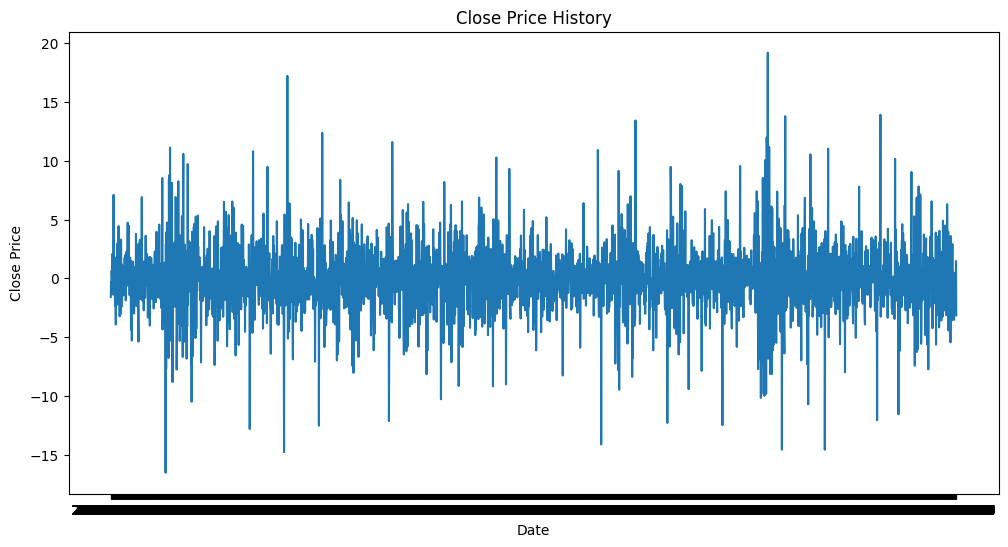

In [47]:
# Plot the 'Close_diff2' column over time
plt.figure(figsize=(12,6))
plt.plot(df['Close_diff2'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

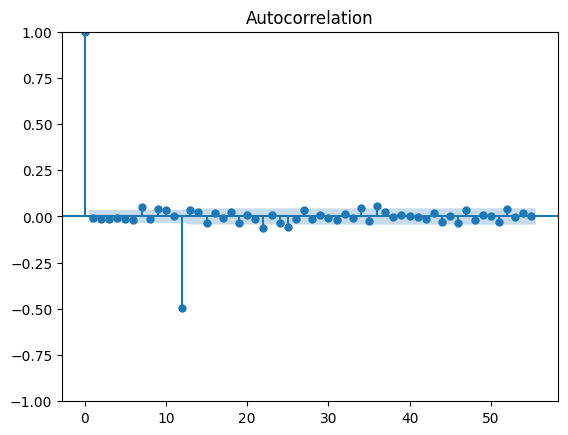

In [48]:
# Plot of autocorrelation for column 'Close_diff2'
plot_acf(df['Close_diff2'], lags=55)
plt.show()

In [49]:
# Ljung Box test
ljung_box = acorr_ljungbox(df['Close_diff2'], lags=20)
print(ljung_box)

       lb_stat      lb_pvalue
1     0.255834   6.129970e-01
2     0.794816   6.720598e-01
3     1.309684   7.268349e-01
4     1.535535   8.203288e-01
5     2.324490   8.026634e-01
6     3.228072   7.797249e-01
7    10.800128   1.475781e-01
8    11.598427   1.700403e-01
9    16.565569   5.596998e-02
10   20.165547   2.772520e-02
11   20.188784   4.281789e-02
12  769.454167  5.853281e-157
13  773.104764  7.926242e-157
14  774.887334  2.594374e-156
15  779.065977  2.521542e-156
16  780.147636  1.087762e-155
17  780.364674  6.945191e-155
18  782.121599  2.022271e-154
19  785.428606  2.684496e-154
20  785.552653  1.648140e-153


In [50]:
# dicky fuller test
result = adfuller(df['Close_diff2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

ADF Statistic: -20.293568
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567
